#### Sensor Network Simulation 
##### *using consensus based filters*

In [1]:
# Import modules
import os
import settings.input
import settings.initialize

# Reload local modules (for testing)
import imp
imp.reload(settings.input)
imp.reload(settings.initialize)

<module 'settings.initialize' from '/Users/shiraz/repos/sensor-network-sim/settings/initialize.py'>

In [2]:
# Get input files
simulation_file = os.path.join("settings","json_files", "simulation",  "ICF-sim.json")
sensor_network_file = os.path.join("settings","json_files", "sensor_network",  "ICF-sensor-network.json")

# Read input files
raw_data = settings.input.read_configs([simulation_file, sensor_network_file])
input_data  = settings.initialize.do_everything(raw_data)

In [3]:
import sim.target
import sim.network
import sim.history

# Reload local modules (for testing)
import imp
imp.reload(sim.target)
imp.reload(sim.network)
imp.reload(sim.history)

<module 'sim.history' from '/Users/shiraz/repos/sensor-network-sim/sim/history.py'>

Plotted history of sensor estimates 2.
Plotted history of sensor estimates 2.
Showing plot...


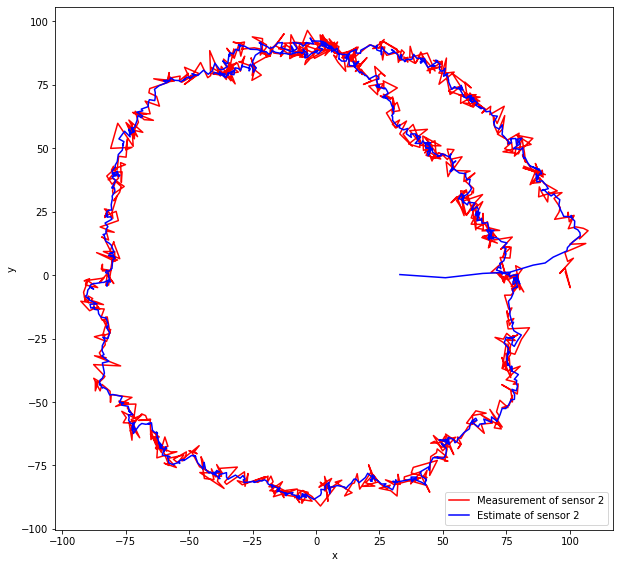

In [4]:
target = sim.target.create(input_data)
network = sim.network.create(input_data)

sim_history = sim.history.create(network)

for t in range(1000):
    sim_history.add_target(target.x)
    
    # Simulation...
    network.make_measurements(target.x)
    
    network.share_info_with_neighbors()
    network.get_info_about_target(target)
    
    network.do_estimations()
    sim_history.add_estimates(network)
    
    target.update()

sim_history.plot_xy(target=False, estimates_of="2", measurements_of="2")

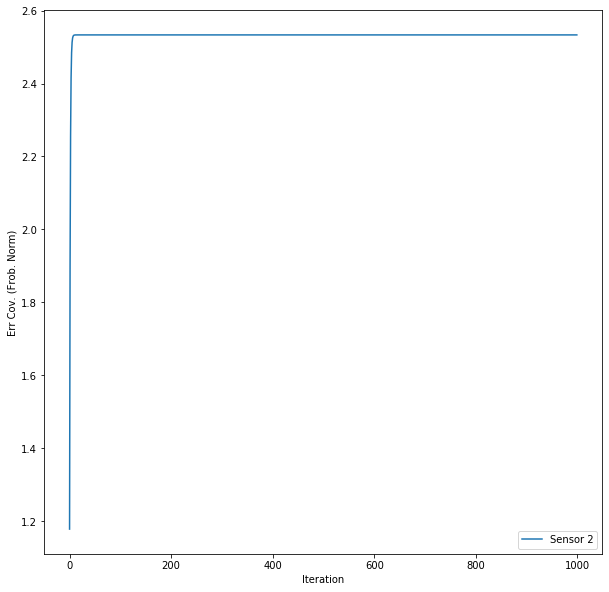

In [5]:
sim_history.plot_timeseries(ErrCov_of="2")

In [8]:
vars(network)

{'SensorClass': sim.estimators.KCF_2007.EstimatorKCF,
 'sensor_params': {'epsilon': 0.25},
 'sensors': {'1': <sim.estimators.KCF_2007.EstimatorKCF at 0x11dbd0750>,
  '2': <sim.estimators.KCF_2007.EstimatorKCF at 0x11dbd0990>,
  '3': <sim.estimators.KCF_2007.EstimatorKCF at 0x11dbd0a50>,
  '4': <sim.estimators.KCF_2007.EstimatorKCF at 0x11dbd0b10>,
  '5': <sim.estimators.KCF_2007.EstimatorKCF at 0x11dbd0c50>},
 'target_info': {'A': array([[ 0.99996916, -0.0078539 ],
         [ 0.0078539 ,  0.99996916]]), 'B': array([[1, 0],
         [0, 1]]), 'NoiseCov': array([[1, 0],
         [0, 1]])},
 'messages': <sim.messages.Messages at 0x11d502050>}

In [18]:
isinstance(sim_history, sim.history.History)

True

In [19]:
input_data

{'simulation': {'total_steps': 1000},
 'target': {'constraints': {'x_initial': [100, 0]},
  'state': {'ss_A': array([[ 0.99996916, -0.0078539 ],
          [ 0.0078539 ,  0.99996916]]), 'ss_B': array([[1, 0],
          [0, 1]]), 'dimension': 2},
  'noise': [[1, 0], [0, 1]]},
 'scheme': 'KCF',
 'network': {'indexing_style': 'matlab',
  'adjacency': [[1, 0, 1, 1, 0],
   [0, 1, 1, 0, 1],
   [1, 1, 1, 1, 1],
   [1, 0, 1, 1, 0],
   [0, 1, 1, 0, 1]],
  'n_sensors': 5,
  'observability': {'1': [[1, 0], [0, 1]],
   '2': [[1, 0], [0, 1]],
   '3': [[1, 0], [0, 1]],
   '4': [[1, 0], [0, 1]],
   '5': [[1, 0], [0, 1]]},
  'noise': {'1': [[5, 0], [0, 5]],
   '2': [[5, 0], [0, 5]],
   '3': [[20, 0], [0, 20]],
   '4': [[5, 0], [0, 5]],
   '5': [[5, 0], [0, 5]]}}}

In [7]:
# from sim.noise import Noise
# from matplotlib.pyplot import plot, show
# x = []
# y = []
# for i in range(200):
#     a = Noise([[0.000002,0],[0,0.000002]]).sample()
#     x.append(a[0])
#     y.append(a[1])
    
# plot(x,y, 'ro')
# show()